<ipython-input-1-228283e235c4>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - loss: 0.0247
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 3.3766e-04
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 2.7508e-04
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 2.8752e-04
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 2.8487e-04
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 2.4100e-04
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 2.9409e-04
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 2.5090e-04
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.1883e-04
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 2.1794e-04
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 3.0859e-04
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 2.1795e-04
Epoch 13/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 2.2160e-04
Epoch 14/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - lo

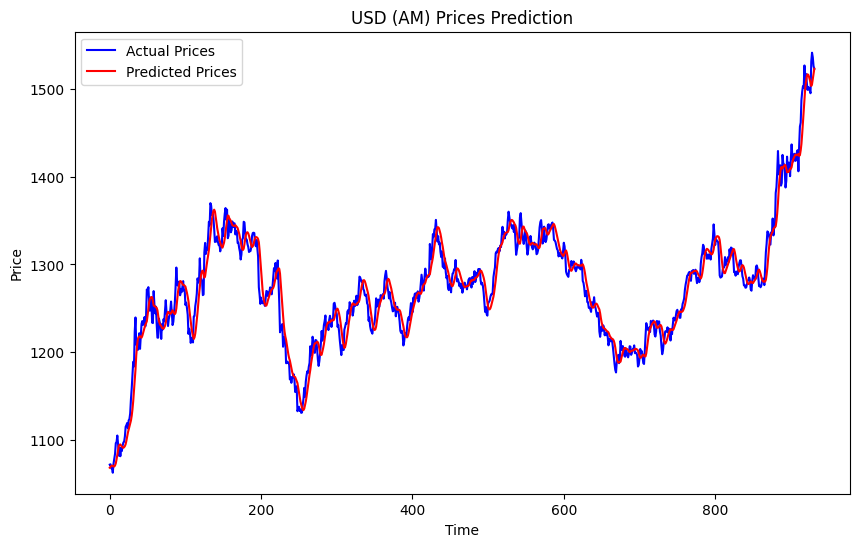

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 2: Load Dataset
file_path = '/content/gold (1).csv'  # Replace with your dataset's path in Colab
data = pd.read_csv(file_path)

# Step 3: Data Preprocessing
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date
data = data.sort_values(by='Date')

# Handle missing values (forward fill)
data.fillna(method='ffill', inplace=True)

# Select the target column (e.g., 'USD (AM)')
target_column = 'USD (AM)'
values = data[[target_column]].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Step 4: Create Sequences for LSTM
sequence_length = 60  # Use the last 60 days to predict the next value
X, y = [], []
for i in range(sequence_length, len(scaled_values)):
    X.append(scaled_values[i-sequence_length:i, 0])
    y.append(scaled_values[i, 0])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 5: Split Data into Training and Testing Sets
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 6: Build the LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the Model
model.fit(X_train, y_train, batch_size=32, epochs=20)

# Step 8: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Step 9: Visualize the Results
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('USD (AM) Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
